## Parabola Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
X_and_Y = np.load('./parabola-estimation.npy')
old_X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
old_X.shape

(300,)

### Original Data

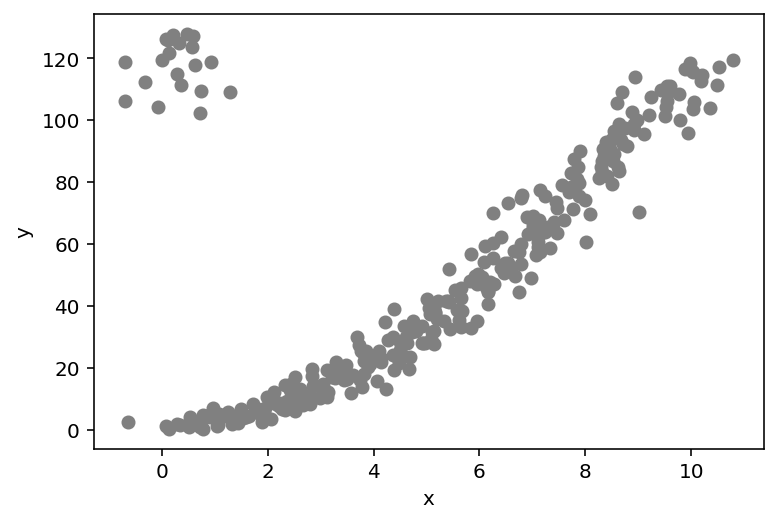

In [3]:
# Visualization.
def vis(w0, w1, w2):
    draw_plane = (w0 is not None) and (w1 is not None) and (w2 is not None)
    if draw_plane:
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, color='orange')
        
    plt.scatter(old_X, Y, color='gray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
vis(None, None, None)

### Parabola Estimation with Squared $L_2$ Norm

Assume data points are represented as matrices $X$ and $Y$, please use the closed form solution to calculate the parameters $W$.

**Hint**: You may refer to HW3 Q4.

In [4]:
# y=w0+w1*x+w2*x^2
X = np.matrix(np.hstack((np.ones((len(old_X),1)),
                         old_X.reshape(-1,1), 
                         (old_X**2).reshape(-1,1))))
W =np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))

y = 51.07 + -16.06*x + 2.36*x^2


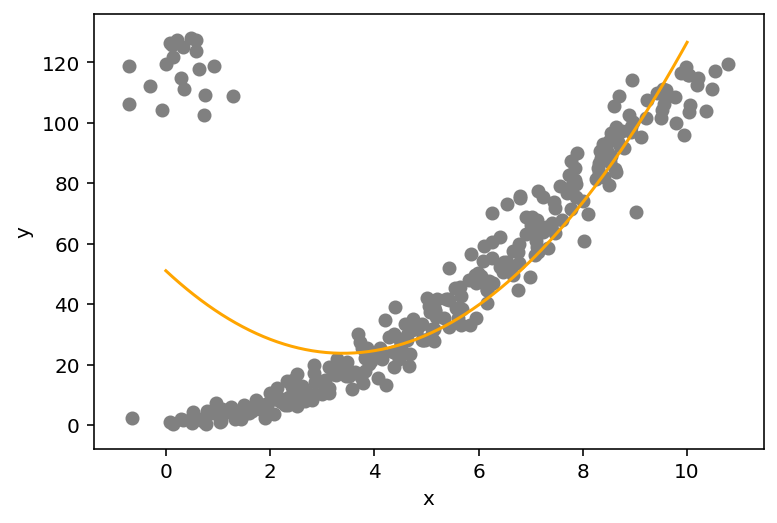

In [5]:
# Visualization.
vis(w0, w1, w2)

### Parabola Estimation with $L_1$  Norm

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the parabola.
If we have a loss function $\mathcal{L}(W)$, then a typical gradient descent algorithm contains the following steps:

**Step 1**. Initialize the parameters W.

for i = 1 to #iterations:

- **Step 2**. Compute the gradient $\nabla \mathcal{L}(W) = \frac{\partial \mathcal{L}(W)}{\partial W}$.

- **Step 3**. Update the parameters $W \leftarrow W - \eta \frac{\partial \mathcal{L}(W)}{\partial W}$ where $\eta$ is the learning rate.

**Hint**: You may refer to HW3 Q6.

In [7]:
# Gradient of L(W) with respect to W.
def grad_L_W(X, Y, W):
    sign = np.sign(X.dot(W) - Y)
    gradient = np.dot(np.transpose(sign),X)
    return gradient[:,0]


6047
y = 1.08 + 1.08*x + 1.08*x^2


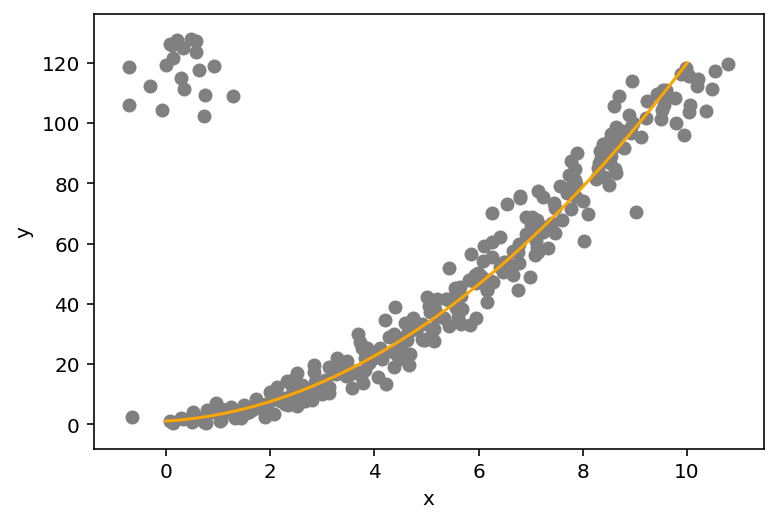

In [8]:
# Some settings.
Y = Y.reshape(-1, 1)
iterations    = 300000
learning_rate = 0.000001

# Gradient descent algorithm.
# Step 1. Initialize the parameters W.
W = np.matrix(np.zeros((3,1)))

for i in range(iterations):
    
    # Step 2. Calculate the gradient of L(W) w.r.t. W. 
    grad = grad_L_W(X, Y, W)
    
    
    # Step 3. Update parameters W.
    W_new = W-learning_rate*grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new

# Print the parameters of the parabola.
w0, w1, w2 = np.array(W).reshape(-1)
print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))

# Visualization.
vis(w0, w1, w2)

### Parabola Estimation with Squared $L_2$ Norm and $L_1$ Norm

In this problem, we would like to use the gradient descent to calculate the parameters $W$ for the parabola.
The loss function $\mathcal{L}(W)$ now contains two parts: A squared $L_2$ norm and a $L_1$ norm.
A coefficient $\alpha$ is used to control the ratio of these two norms:

$$
\begin{align}
\mathcal{L}(W) 
& = \sum_{i=1}^{n} 
\Big(\alpha\big(\mathbf{x}_i^T W - y_i\big)^2 + (1-\alpha)|\mathbf{x}_i^T W - y_i| \Big) \\
& = \alpha\left\lVert X W - Y \right\rVert_2^2 + (1-\alpha)\left\lVert X W - Y \right\rVert_1 \\
\nonumber
\end{align}
$$

**Note:** It may take 2~3 mins to run the algorithm.

In [38]:
# Gradient of L(W) with respect to W.
def grad_L_W(X, Y, W, alpha):
    sign = np.sign(X.dot(W) - Y) #300,1
    L1 = np.dot(sign.T, X) #1,3
    L2 = 2*((X.dot(W)- Y).T.dot(X)) #1,3 
    gradient = (1-alpha)*L1+alpha*L2
    gradient=gradient.T
    return gradient

In [40]:
# Use gradient descent to estimate parabola given a list of a(s).
def parabola(alpha_list):
    # Some settings.
    global Y
    plt.scatter(old_X, Y, color='gray')
    Y = Y.reshape(-1, 1)
    iterations    = 300000
    learning_rate = 0.000001
    
    # Loop over alpha(s).
    for alpha in alpha_list:
        # Gradient descent algorithm.
        # Step 1. Initialize the parameters W.
        W = np.matrix(np.zeros((3,1)))
        for i in range(iterations):   
            # Step 2. Calculate the gradient of L(W) w.r.t. W. 
            grad = grad_L_W(X, Y, W,alpha)
            # Step 3. Update parameters W.
            W_new = W-learning_rate*grad
            if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
                    print(i)
                    break
            W = W_new
        # Print the parameters of the parabola.
        w0, w1, w2 = np.array(W).reshape(-1)
        print('When alpha = {},'.format(alpha))
        print('y = {:.2f} + {:.2f}*x + {:.2f}*x^2'.format(w0, w1, w2))
         # Visualization.
        X_line = np.linspace(0,10,300)
        Y_line = w0 + w1 * X_line + w2 * (X_line**2)
        plt.plot(X_line, Y_line, label='alpha={}'.format(alpha))

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

41383
When alpha = 0,
y = 1.07 + 1.43*x + 1.03*x^2
When alpha = 0.03,
y = 20.82 + -5.27*x + 1.53*x^2
When alpha = 0.05,
y = 30.17 + -8.45*x + 1.77*x^2
When alpha = 0.1,
y = 42.31 + -12.78*x + 2.11*x^2
88878
When alpha = 1,
y = 50.97 + -16.02*x + 2.36*x^2


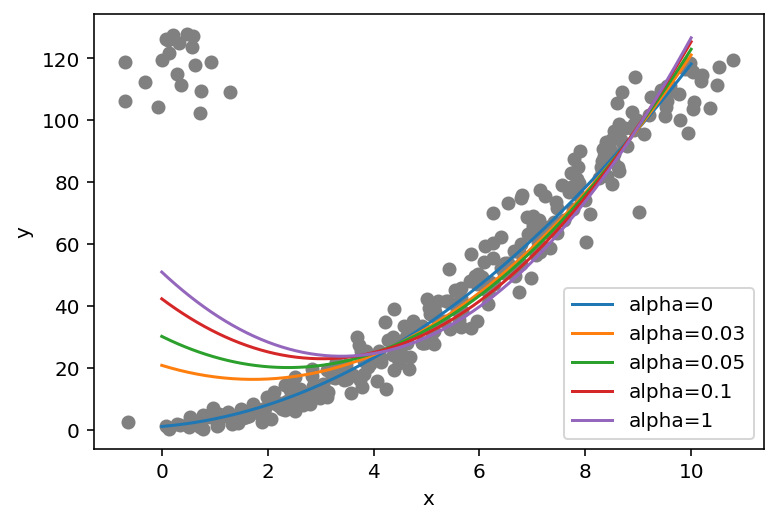

In [41]:
# Estimate the parabolas given the list of alpha(s).
parabola(alpha_list=[0,0.03,0.05,0.1,1]) 

## Question 4

As we can see, the higher alpha values tend to have more of a leftward tail, showing that their modeling function is more affected by the outliers. Thus, an observable trend is that as the alpha value gets higher, the weight the model places on the outlier data points increases. This is because alpha multiplies the l2 norm which is more conducive to being affected by outliers. Likewise as alpha goes down, the l1 norm is multiplied by a larger number and thus, the graph is less affected by outliers. This is because the l2 norm is multiplied by 1-alpha which is more robust to outliers. Summing them together, you get both of the effects on both of the norms corresponding to how the alpha value varies. 